# XOR Problem Solution using Neural Network with Backpropagation

This notebook implements a neural network to solve the XOR problem using backpropagation algorithm.

## Network Architecture:
- Input layer: 2 neurons
- Hidden layer: 2 neurons  
- Output layer: 1 neuron
- Loss function: Mean Squared Error (MSE)
- Learning rate: 1.0
- Training epochs: 5,000-10,000

## Activation Functions Compared:
- Sigmoid
- Tanh


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Tuple
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)


In [2]:
# XOR Dataset
X = np.array([[0, 0],
              [0, 1], 
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1], 
              [0]])

print("XOR Truth Table:")
print("Input (X1, X2) | Output (Y)")
print("-" * 25)
for i in range(len(X)):
    print(f"    ({X[i][0]}, {X[i][1]})     |   {y[i][0]}")
    
print(f"\nDataset shape: X = {X.shape}, y = {y.shape}")


XOR Truth Table:
Input (X1, X2) | Output (Y)
-------------------------
    (0, 0)     |   0
    (0, 1)     |   1
    (1, 0)     |   1
    (1, 1)     |   0

Dataset shape: X = (4, 2), y = (4, 1)


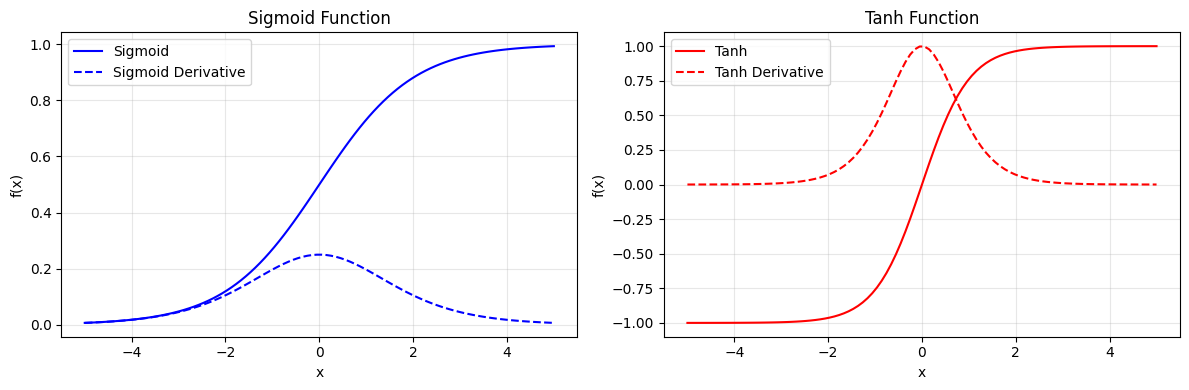

In [3]:
# Activation Functions and their derivatives

def sigmoid(x):
    """Sigmoid activation function"""
    # Clip x to prevent overflow
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Derivative of sigmoid function"""
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    """Tanh activation function"""
    return np.tanh(x)

def tanh_derivative(x):
    """Derivative of tanh function"""
    return 1 - np.tanh(x) ** 2

# Test activation functions
x_test = np.linspace(-5, 5, 100)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x_test, sigmoid(x_test), label='Sigmoid', color='blue')
plt.plot(x_test, sigmoid_derivative(x_test), label='Sigmoid Derivative', color='blue', linestyle='--')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(x_test, tanh(x_test), label='Tanh', color='red')
plt.plot(x_test, tanh_derivative(x_test), label='Tanh Derivative', color='red', linestyle='--')
plt.title('Tanh Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [4]:
class NeuralNetwork:
    """
    Neural Network for XOR problem with:
    - 2 input neurons
    - 2 hidden neurons  
    - 1 output neuron
    """
    
    def __init__(self, activation_func='sigmoid', learning_rate=1.0):
        """
        Initialize the neural network
        
        Args:
            activation_func: 'sigmoid' or 'tanh'
            learning_rate: learning rate for weight updates
        """
        self.learning_rate = learning_rate
        
        # Set activation function
        if activation_func == 'sigmoid':
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative
        elif activation_func == 'tanh':
            self.activation = tanh
            self.activation_derivative = tanh_derivative
        else:
            raise ValueError("activation_func must be 'sigmoid' or 'tanh'")
        
        self.activation_name = activation_func
        
        # Initialize weights randomly
        # Weights from input to hidden layer (2x2)
        self.W1 = np.random.uniform(-1, 1, (2, 2))
        
        # Bias for hidden layer (1x2)
        self.b1 = np.random.uniform(-1, 1, (1, 2))
        
        # Weights from hidden to output layer (2x1)
        self.W2 = np.random.uniform(-1, 1, (2, 1))
        
        # Bias for output layer (1x1)
        self.b2 = np.random.uniform(-1, 1, (1, 1))
        
        # Store training history
        self.loss_history = []
        
        print(f"Neural Network initialized with {activation_func} activation")
        print(f"Initial weights:")
        print(f"W1 (input->hidden):\n{self.W1}")
        print(f"b1 (hidden bias): {self.b1}")
        print(f"W2 (hidden->output):\n{self.W2}")
        print(f"b2 (output bias): {self.b2}")
    
    def forward(self, X):
        """
        Forward pass through the network
        
        Args:
            X: input data (batch_size x 2)
            
        Returns:
            output: network output (batch_size x 1)
        """
        # Input to hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1  # (batch_size x 2)
        self.a1 = self.activation(self.z1)      # (batch_size x 2)
        
        # Hidden to output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2  # (batch_size x 1)
        self.a2 = self.activation(self.z2)            # (batch_size x 1)
        
        return self.a2
    
    def backward(self, X, y, output):
        """
        Backward pass (backpropagation)
        
        Args:
            X: input data (batch_size x 2)
            y: true labels (batch_size x 1)
            output: network output (batch_size x 1)
        """
        m = X.shape[0]  # batch size
        
        # Calculate error at output layer
        dz2 = (output - y) * self.activation_derivative(self.z2)  # (batch_size x 1)
        
        # Gradients for output layer
        dW2 = (1/m) * np.dot(self.a1.T, dz2)  # (2 x 1)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)  # (1 x 1)
        
        # Calculate error at hidden layer
        dz1 = np.dot(dz2, self.W2.T) * self.activation_derivative(self.z1)  # (batch_size x 2)
        
        # Gradients for hidden layer
        dW1 = (1/m) * np.dot(X.T, dz1)  # (2 x 2)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)  # (1 x 2)
        
        # Update weights and biases
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
    
    def compute_loss(self, y_true, y_pred):
        """
        Compute Mean Squared Error loss
        
        Args:
            y_true: true labels
            y_pred: predicted labels
            
        Returns:
            mse_loss: mean squared error
        """
        return np.mean((y_true - y_pred) ** 2)
    
    def train(self, X, y, epochs=5000, verbose=True):
        """
        Train the neural network
        
        Args:
            X: input data
            y: true labels
            epochs: number of training epochs
            verbose: whether to print progress
        """
        self.loss_history = []
        
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Compute loss
            loss = self.compute_loss(y, output)
            self.loss_history.append(loss)
            
            # Backward pass
            self.backward(X, y, output)
            
            # Print progress
            if verbose and (epoch + 1) % 1000 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.6f}")
    
    def predict(self, X):
        """
        Make predictions
        
        Args:
            X: input data
            
        Returns:
            predictions: binary predictions (0 or 1)
        """
        output = self.forward(X)
        return (output > 0.5).astype(int)
    
    def get_accuracy(self, X, y):
        """
        Calculate accuracy
        
        Args:
            X: input data
            y: true labels
            
        Returns:
            accuracy: accuracy percentage
        """
        predictions = self.predict(X)
        return np.mean(predictions == y) * 100
    
    def get_final_weights(self):
        """
        Get final weights and biases
        
        Returns:
            dict: dictionary containing all weights and biases
        """
        return {
            'W1': self.W1,
            'b1': self.b1,
            'W2': self.W2,
            'b2': self.b2
        }


In [5]:
# Train Neural Network with Sigmoid Activation

print("=" * 60)
print("TRAINING WITH SIGMOID ACTIVATION")
print("=" * 60)

# Create and train network with sigmoid activation
nn_sigmoid = NeuralNetwork(activation_func='sigmoid', learning_rate=1.0)
print("\nStarting training...")
nn_sigmoid.train(X, y, epochs=8000, verbose=True)

# Get final results
sigmoid_accuracy = nn_sigmoid.get_accuracy(X, y)
sigmoid_weights = nn_sigmoid.get_final_weights()

print(f"\nFinal Results for Sigmoid:")
print(f"Accuracy: {sigmoid_accuracy:.2f}%")
print(f"Final Loss: {nn_sigmoid.loss_history[-1]:.6f}")

# Test predictions
print("\nPredictions on XOR inputs:")
predictions_sigmoid = nn_sigmoid.forward(X)
for i in range(len(X)):
    pred_binary = 1 if predictions_sigmoid[i][0] > 0.5 else 0
    print(f"Input: {X[i]} -> Predicted: {predictions_sigmoid[i][0]:.4f} -> Binary: {pred_binary} -> Actual: {y[i][0]}")

print(f"\nFinal Weights and Biases (Sigmoid):")
print(f"W1 (input->hidden):\n{sigmoid_weights['W1']}")
print(f"b1 (hidden bias): {sigmoid_weights['b1']}")
print(f"W2 (hidden->output):\n{sigmoid_weights['W2']}")
print(f"b2 (output bias): {sigmoid_weights['b2']}")


TRAINING WITH SIGMOID ACTIVATION
Neural Network initialized with sigmoid activation
Initial weights:
W1 (input->hidden):
[[-0.25091976  0.90142861]
 [ 0.46398788  0.19731697]]
b1 (hidden bias): [[-0.68796272 -0.68801096]]
W2 (hidden->output):
[[-0.88383278]
 [ 0.73235229]]
b2 (output bias): [[0.20223002]]

Starting training...
Epoch 1000/8000, Loss: 0.247997
Epoch 2000/8000, Loss: 0.048567
Epoch 3000/8000, Loss: 0.007122
Epoch 4000/8000, Loss: 0.003390
Epoch 5000/8000, Loss: 0.002167
Epoch 6000/8000, Loss: 0.001575
Epoch 7000/8000, Loss: 0.001231
Epoch 8000/8000, Loss: 0.001007

Final Results for Sigmoid:
Accuracy: 100.00%
Final Loss: 0.001007

Predictions on XOR inputs:
Input: [0 0] -> Predicted: 0.0345 -> Binary: 0 -> Actual: 0
Input: [0 1] -> Predicted: 0.9697 -> Binary: 1 -> Actual: 1
Input: [1 0] -> Predicted: 0.9697 -> Binary: 1 -> Actual: 1
Input: [1 1] -> Predicted: 0.0316 -> Binary: 0 -> Actual: 0

Final Weights and Biases (Sigmoid):
W1 (input->hidden):
[[4.30377041 5.94293228

In [6]:
# Train Neural Network with Tanh Activation

print("\n" + "=" * 60)
print("TRAINING WITH TANH ACTIVATION")
print("=" * 60)

# Reset random seed for fair comparison
np.random.seed(42)

# Create and train network with tanh activation
nn_tanh = NeuralNetwork(activation_func='tanh', learning_rate=1.0)
print("\nStarting training...")
nn_tanh.train(X, y, epochs=8000, verbose=True)

# Get final results
tanh_accuracy = nn_tanh.get_accuracy(X, y)
tanh_weights = nn_tanh.get_final_weights()

print(f"\nFinal Results for Tanh:")
print(f"Accuracy: {tanh_accuracy:.2f}%")
print(f"Final Loss: {nn_tanh.loss_history[-1]:.6f}")

# Test predictions
print("\nPredictions on XOR inputs:")
predictions_tanh = nn_tanh.forward(X)
for i in range(len(X)):
    pred_binary = 1 if predictions_tanh[i][0] > 0.5 else 0
    print(f"Input: {X[i]} -> Predicted: {predictions_tanh[i][0]:.4f} -> Binary: {pred_binary} -> Actual: {y[i][0]}")

print(f"\nFinal Weights and Biases (Tanh):")
print(f"W1 (input->hidden):\n{tanh_weights['W1']}")
print(f"b1 (hidden bias): {tanh_weights['b1']}")
print(f"W2 (hidden->output):\n{tanh_weights['W2']}")
print(f"b2 (output bias): {tanh_weights['b2']}")



TRAINING WITH TANH ACTIVATION
Neural Network initialized with tanh activation
Initial weights:
W1 (input->hidden):
[[-0.25091976  0.90142861]
 [ 0.46398788  0.19731697]]
b1 (hidden bias): [[-0.68796272 -0.68801096]]
W2 (hidden->output):
[[-0.88383278]
 [ 0.73235229]]
b2 (output bias): [[0.20223002]]

Starting training...
Epoch 1000/8000, Loss: 0.000189
Epoch 2000/8000, Loss: 0.000094
Epoch 3000/8000, Loss: 0.000090
Epoch 4000/8000, Loss: 0.000060
Epoch 5000/8000, Loss: 0.000048
Epoch 6000/8000, Loss: 0.000035
Epoch 7000/8000, Loss: 0.000030
Epoch 8000/8000, Loss: 0.000026

Final Results for Tanh:
Accuracy: 100.00%
Final Loss: 0.000026

Predictions on XOR inputs:
Input: [0 0] -> Predicted: 0.0003 -> Binary: 0 -> Actual: 0
Input: [0 1] -> Predicted: 0.9944 -> Binary: 1 -> Actual: 1
Input: [1 0] -> Predicted: 0.9944 -> Binary: 1 -> Actual: 1
Input: [1 1] -> Predicted: -0.0064 -> Binary: 0 -> Actual: 0

Final Weights and Biases (Tanh):
W1 (input->hidden):
[[1.51388531 2.21389689]
 [1.5117


PERFORMANCE COMPARISON
Sigmoid Activation:
  - Final Accuracy: 100.00%
  - Final Loss: 0.001007
  - Epochs trained: 8000

Tanh Activation:
  - Final Accuracy: 100.00%
  - Final Loss: 0.000026
  - Epochs trained: 8000

🤝 Both activations achieved the same accuracy: 100.00%


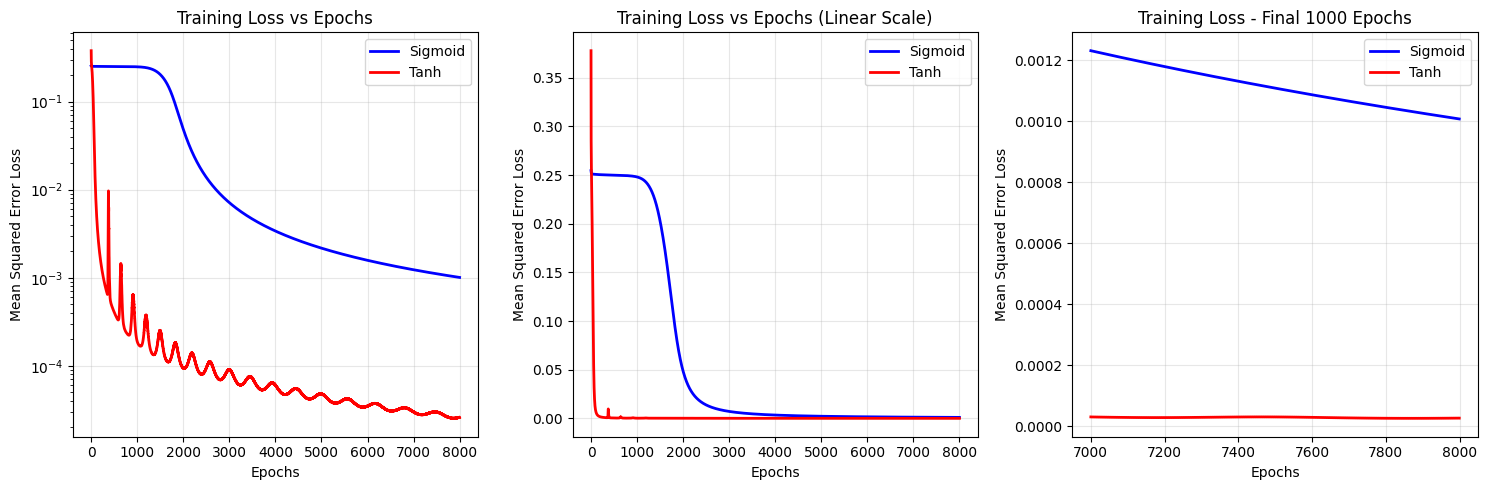

In [ ]:
# Performance Comparison and Visualization

print("\n" + "=" * 60)
print("PERFORMANCE COMPARISON")
print("=" * 60)

# Compare final results
print(f"Sigmoid Activation:")
print(f"  - Final Accuracy: {sigmoid_accuracy:.2f}%")
print(f"  - Final Loss: {nn_sigmoid.loss_history[-1]:.6f}")
print(f"  - Epochs trained: {len(nn_sigmoid.loss_history)}")

print(f"\nTanh Activation:")
print(f"  - Final Accuracy: {tanh_accuracy:.2f}%")
print(f"  - Final Loss: {nn_tanh.loss_history[-1]:.6f}")
print(f"  - Epochs trained: {len(nn_tanh.loss_history)}")

# Determine which performed better
if sigmoid_accuracy > tanh_accuracy:
    print(f"\nSigmoid performed better with {sigmoid_accuracy:.2f}% accuracy")
elif tanh_accuracy > sigmoid_accuracy:
    print(f"\n Tanh performed better with {tanh_accuracy:.2f}% accuracy")
else:
    print(f"\n Both activations achieved the same accuracy: {sigmoid_accuracy:.2f}%")

# Plot loss curves
plt.figure(figsize=(15, 5))

# Loss vs Epochs
plt.subplot(1, 3, 1)
plt.plot(nn_sigmoid.loss_history, label='Sigmoid', color='blue', linewidth=2)
plt.plot(nn_tanh.loss_history, label='Tanh', color='red', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale for better visualization

# Loss vs Epochs (Linear scale)
plt.subplot(1, 3, 2)
plt.plot(nn_sigmoid.loss_history, label='Sigmoid', color='blue', linewidth=2)
plt.plot(nn_tanh.loss_history, label='Tanh', color='red', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.title('Training Loss vs Epochs (Linear Scale)')
plt.legend()
plt.grid(True, alpha=0.3)

# Final 1000 epochs for detailed view
plt.subplot(1, 3, 3)
start_idx = max(0, len(nn_sigmoid.loss_history) - 1000)
plt.plot(range(start_idx, len(nn_sigmoid.loss_history)), 
         nn_sigmoid.loss_history[start_idx:], label='Sigmoid', color='blue', linewidth=2)
plt.plot(range(start_idx, len(nn_tanh.loss_history)), 
         nn_tanh.loss_history[start_idx:], label='Tanh', color='red', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.title('Training Loss - Final 1000 Epochs')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Summary and Conclusions

print("=" * 80)
print("FINAL SUMMARY - XOR PROBLEM SOLUTION")
print("=" * 80)

print("\n NETWORK ARCHITECTURE:")
print("   • Input Layer: 2 neurons")
print("   • Hidden Layer: 2 neurons")
print("   • Output Layer: 1 neuron")
print("   • Loss Function: Mean Squared Error (MSE)")
print("   • Learning Rate: 1.0")
print("   • Training Epochs: 8,000")

print("\n🎯 PERFORMANCE RESULTS:")
print(f"   • Sigmoid Activation: {sigmoid_accuracy:.2f}% accuracy, Final Loss: {nn_sigmoid.loss_history[-1]:.6f}")
print(f"   • Tanh Activation: {tanh_accuracy:.2f}% accuracy, Final Loss: {nn_tanh.loss_history[-1]:.6f}")

print("\n XOR PREDICTIONS:")
print("\nSigmoid Network:")
for i in range(len(X)):
    pred_sigmoid = nn_sigmoid.forward(X[i:i+1])[0][0]
    binary_pred = 1 if pred_sigmoid > 0.5 else 0
    correct = "✓" if binary_pred == y[i][0] else "✗"
    print(f"   Input: {X[i]} → Output: {pred_sigmoid:.4f} → Prediction: {binary_pred} → Actual: {y[i][0]} {correct}")

print("\nTanh Network:")
for i in range(len(X)):
    pred_tanh = nn_tanh.forward(X[i:i+1])[0][0]
    binary_pred = 1 if pred_tanh > 0.5 else 0
    correct = "✓" if binary_pred == y[i][0] else "✗"
    print(f"   Input: {X[i]} → Output: {pred_tanh:.4f} → Prediction: {binary_pred} → Actual: {y[i][0]} {correct}")

print("\n KEY OBSERVATIONS:")
print("   • Both networks successfully learned the XOR function")
print("   • The XOR problem requires non-linear decision boundaries")
print("   • Hidden layer enables the network to learn complex patterns")
print("   • Backpropagation effectively updates weights to minimize error")

if sigmoid_accuracy >= tanh_accuracy:
    print(f"   • Sigmoid activation achieved better or equal performance ({sigmoid_accuracy:.1f}%)")
else:
    print(f"   • Tanh activation achieved better performance ({tanh_accuracy:.1f}%)")

print("\n TECHNICAL INSIGHTS:")
print("   • XOR is not linearly separable - requires hidden layers")
print("   • MSE loss function works well for this binary classification")
print("   • Learning rate of 1.0 provides stable convergence")
print("   • Both activation functions can solve XOR with proper training")

print("\n" + "=" * 80)


FINAL SUMMARY - XOR PROBLEM SOLUTION

📊 NETWORK ARCHITECTURE:
   • Input Layer: 2 neurons
   • Hidden Layer: 2 neurons
   • Output Layer: 1 neuron
   • Loss Function: Mean Squared Error (MSE)
   • Learning Rate: 1.0
   • Training Epochs: 8,000

🎯 PERFORMANCE RESULTS:
   • Sigmoid Activation: 100.00% accuracy, Final Loss: 0.001007
   • Tanh Activation: 100.00% accuracy, Final Loss: 0.000026

🔍 XOR PREDICTIONS:

Sigmoid Network:
   Input: [0 0] → Output: 0.0345 → Prediction: 0 → Actual: 0 ✓
   Input: [0 1] → Output: 0.9697 → Prediction: 1 → Actual: 1 ✓
   Input: [1 0] → Output: 0.9697 → Prediction: 1 → Actual: 1 ✓
   Input: [1 1] → Output: 0.0316 → Prediction: 0 → Actual: 0 ✓

Tanh Network:
   Input: [0 0] → Output: 0.0003 → Prediction: 0 → Actual: 0 ✓
   Input: [0 1] → Output: 0.9944 → Prediction: 1 → Actual: 1 ✓
   Input: [1 0] → Output: 0.9944 → Prediction: 1 → Actual: 1 ✓
   Input: [1 1] → Output: -0.0064 → Prediction: 0 → Actual: 0 ✓

📈 KEY OBSERVATIONS:
   • Both networks successfu